In [1]:
import pandas as pd

In [2]:
# read in the data
crypt_data = pd.read_csv('Resources/crypto_data.csv')

In [3]:
crypt_data.head()

,Unnamed: 0,CoinName,Algorithm,IsTrading,ProofType,TotalCoinsMined,TotalCoinSupply
0,42,42 Coin,Scrypt,True,PoW/PoS,4.199995e+01,42
1,365,365Coin,X11,True,PoW/PoS,NaN,2300000000
2,404,404Coin,Scrypt,True,PoW/PoS,1.055185e+09,532000000
3,611,SixEleven,SHA-256,True,PoW,NaN,611000
4,808,808,SHA-256,True,PoW/PoS,0.000000e+00,0


## Data Preparation

In [21]:
# filter the data with isTrading = True
crypt_df = crypt_data[crypt_data['IsTrading']== True]

In [22]:
# drop all nan rows, drop 'IsTrading' and 'CoinName' column
crypt_df = crypt_df.drop(['IsTrading','CoinName'], axis = 1)
crypt_df = crypt_df.dropna()

In [23]:
crypt_df.head()
crypt_df['TotalCoinSupply'] = pd.to_numeric(crypt_df['TotalCoinSupply'])

In [24]:
crypt_df = pd.get_dummies(crypt_df)

In [25]:
crypt_df.head()

,TotalCoinsMined,TotalCoinSupply,Unnamed: 0_1337,Unnamed: 0_1CR,Unnamed: 0_404,Unnamed: 0_42,Unnamed: 0_808,Unnamed: 0_8BIT,Unnamed: 0_AAC,Unnamed: 0_ABJ,...,ProofType_PoW/PoS,ProofType_PoW/PoS,ProofType_PoW/PoW,ProofType_PoW/nPoS,ProofType_Pos,ProofType_Proof of Authority,ProofType_Proof of Trust,ProofType_TPoS,ProofType_Zero-Knowledge Proof,ProofType_dPoW/PoW
0,4.199995e+01,4.200000e+01,0,0,0,1,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
2,1.055185e+09,5.320000e+08,0,0,1,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
4,0.000000e+00,0.000000e+00,0,0,0,0,1,0,0,0,...,1,0,0,0,0,0,0,0,0,0
5,2.927942e+10,3.141593e+11,1,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
7,1.792718e+07,2.100000e+07,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [9]:
# Standardize dataset
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [10]:
scaled_data = scaler.fit_transform(crypt_df)

## Dimensionality Reduction

In [11]:
from sklearn.decomposition import PCA

In [12]:
# Initialize PCA model
# preserve 90% of the explained variance in dimensionality reduction.
pca = PCA(n_components=0.90)

# Get two principal components for the iris data.
crypto_pca = pca.fit_transform(scaled_data)

In [13]:
from sklearn.manifold import TSNE

In [14]:
# further reduce the dataset dimensions with t-SNE 
tsne = TSNE(learning_rate=600)
crypto_tsne = tsne.fit_transform(crypto_pca)

In [15]:
import matplotlib.pyplot as plt

In [16]:
crypt_df['x'] = crypto_tsne[:,0]
crypt_df['y'] = crypto_tsne[:,1]

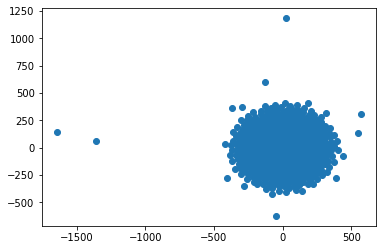

In [17]:
plt.scatter(crypt_df['x'],crypt_df['y'])
plt.show()

The scatter plot shows distinct clusters

## Cluster Analysis with K-Means

In [18]:
from sklearn.cluster import KMeans

###  Finding the best value for _k_ using the Elbow Curve

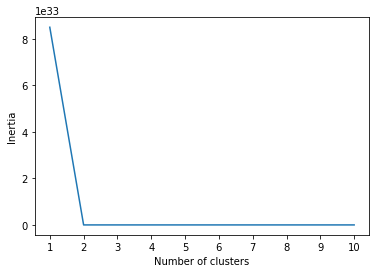

In [26]:
inertia = []
k = list(range(1, 11))

# Looking for the best k
for i in k:
    km = KMeans(n_clusters=i, random_state=0)
    km.fit(crypt_df)
    inertia.append(km.inertia_)

# Define a DataFrame to plot the Elbow Curve using hvPlot
elbow_data = {"k": k, "inertia": inertia}
df_elbow = pd.DataFrame(elbow_data)

plt.plot(df_elbow['k'], df_elbow['inertia'])
plt.xticks(range(1,11))
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.show()

In [20]:
df_elbow

,k,inertia
0,1,8.494638e+33
1,2,3.581693e+24
2,3,1.093111e+24
3,4,6.542178e+23
4,5,2.672289e+23
5,6,1.366996e+23
6,7,8.804342e+22
7,8,6.079067e+22
8,9,4.432394e+22
9,10,3.357427e+22


- The best k value from the elbow plot is 2